# Eksplorasi Data Properti: Harga, Lokasi, dan Spesifikasi Rumah di Yogyakarta

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yogyakarta-housing-price-ndonesia/rumah123_yogya_unfiltered.csv


# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Define Questions

Research question:
* Apa harga tertinggi dari rumah di Yogyakarta?
* Apa harga terendah dari rumah di Yogyakarta?
* Berapa harga rata-rata properti di setiap kecamatan (lokasi)?
* Berapa harga rata-rata properti berdasarkan jumlah kamar tidur atau kamar mandi?
* Apa properti dengan luas tanah terbesar di Yogyakarta?
* Berapa harga rata-rata properti per m² (berdasarkan luas tanah atau luas bangunan)?
* Distribusi harga properti di setiap kecamatan, mana yang paling mahal atau paling murah?
* Apa harga rumah berdasarkan kriteria tertentu seperti minimal 3 kamar tidur dan 2 kamar mandi?

# Data Wragling

Gathering Data

In [3]:
df = pd.read_csv('/kaggle/input/yogyakarta-housing-price-ndonesia/rumah123_yogya_unfiltered.csv')
df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²


# Preprocessing Data

Cleaning Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   object 
 1   nav-link          2020 non-null   object 
 2   description       2020 non-null   object 
 3   listing-location  2020 non-null   object 
 4   bed               2001 non-null   float64
 5   bath              1999 non-null   float64
 6   carport           1713 non-null   float64
 7   surface_area      2019 non-null   object 
 8   building_area     2019 non-null   object 
dtypes: float64(3), object(6)
memory usage: 142.2+ KB


In [5]:
def format_price(price_str):
  """Formats price string into an integer."""
  if pd.isnull(price_str):
    return None

  price_str = price_str.replace(',', '.').replace('Rp', '').strip()
  if 'Juta' in price_str:
    price_num = float(price_str.replace('Juta', '').strip()) * 1000000
  elif 'Miliar' in price_str:
    price_num = float(price_str.replace('Miliar', '').strip()) * 1000000000
  else:
    try:
      price_num = int(float(price_str))
    except ValueError:
      return None

  return int(price_num)


df['price'] = df['price'].apply(format_price)

# Print the updated DataFrame
df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,1790000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,170000000,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,695000000,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,560000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,200000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²


In [6]:
def format_area(area_str):
  """Formats surface area and building area strings into integers.

  Args:
    area_str: The area string to format.

  Returns:
    An integer representing the area, or None if the string is invalid.
  """
  try:
    area_str = str(area_str).replace('m²', '').strip()
    return int(area_str)
  except (ValueError, TypeError):
    return None

# Apply the function to the relevant columns
df['surface_area'] = df['surface_area'].apply(format_area)
df['building_area'] = df['building_area'].apply(format_area)

# Print the updated DataFrame
df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,1790000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120.0,110.0
1,170000000,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102.0,126.0
2,695000000,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100.0,100.0
3,560000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109.0,67.0
4,200000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60.0,30.0


In [7]:
df.isna().sum()

price                 0
nav-link              0
description           0
listing-location      0
bed                  19
bath                 21
carport             307
surface_area          1
building_area         1
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,price,bed,bath,carport,surface_area,building_area
count,2.020000e+03,2001.000000,1999.000000,1713.000000,2019.000000,2.019000e+03
mean,1.840271e+09,3.969015,2.941971,1.559253,185.711243,1.192893e+06
std,2.699891e+09,3.671654,3.517671,1.283030,250.696507,5.359390e+07
min,7.000000e+06,1.000000,1.000000,1.000000,4.000000,4.000000e+00
25%,6.450000e+08,2.000000,1.000000,1.000000,97.000000,6.000000e+01
50%,1.100000e+09,3.000000,2.000000,1.000000,120.000000,1.000000e+02
75%,2.132500e+09,4.000000,3.000000,2.000000,178.000000,1.650000e+02
max,4.210000e+10,49.000000,49.000000,15.000000,4222.000000,2.408150e+09


In [10]:
df = df.dropna(subset=['surface_area', 'building_area'])
df.isna().sum()

price                 0
nav-link              0
description           0
listing-location      0
bed                  19
bath                 21
carport             306
surface_area          0
building_area         0
dtype: int64

Data Reduction

In [11]:
# Fill NaN values in 'bed', 'bath', and 'carport' columns with their respective modes
for column in ['bed', 'bath', 'carport']:
  df[column].fillna(df[column].mode()[0], inplace=True)

df.isna().sum()

/tmp/ipykernel_18/3376975035.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


price               0
nav-link            0
description         0
listing-location    0
bed                 0
bath                0
carport             0
surface_area        0
building_area       0
dtype: int64

Data Type Conversion

In [12]:
df['bed'] = df['bed'].astype(int)
df['bath'] = df['bath'].astype(int)
df['carport'] = df['carport'].astype(int)
df['surface_area'] = df['surface_area'].astype(int)
df['building_area'] = df['building_area'].astype(int)

df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,1790000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3,3,2,120,110
1,170000000,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3,2,1,102,126
2,695000000,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2,2,1,100,100
3,560000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3,1,1,109,67
4,200000000,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2,1,1,60,30


In [13]:
numerical_columns = ['price', 'bed', 'bath', 'carport', 'surface_area', 'building_area']

# Exploratory Data Analysis (EDA)

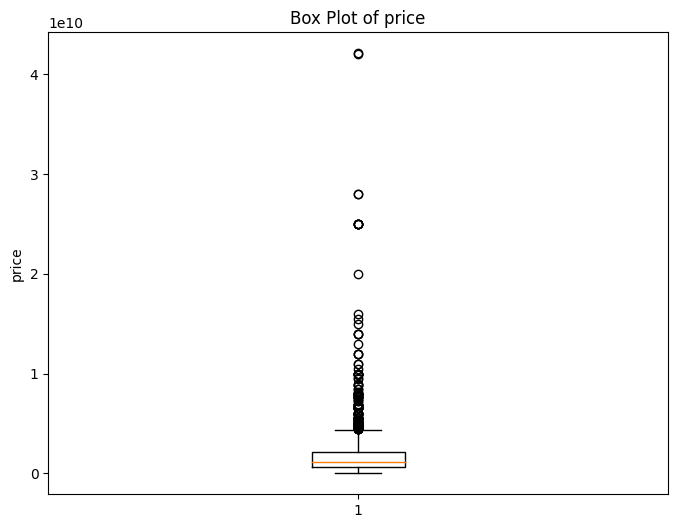

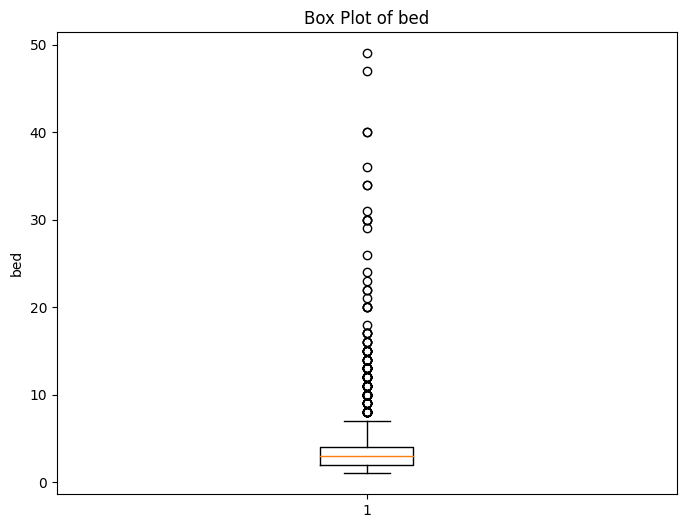

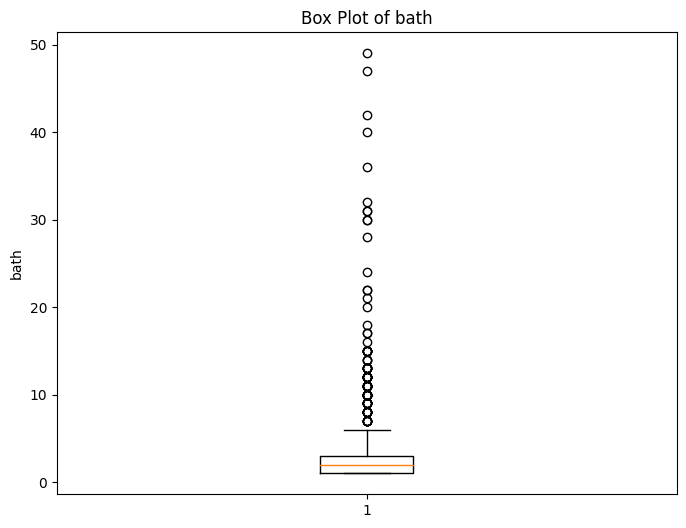

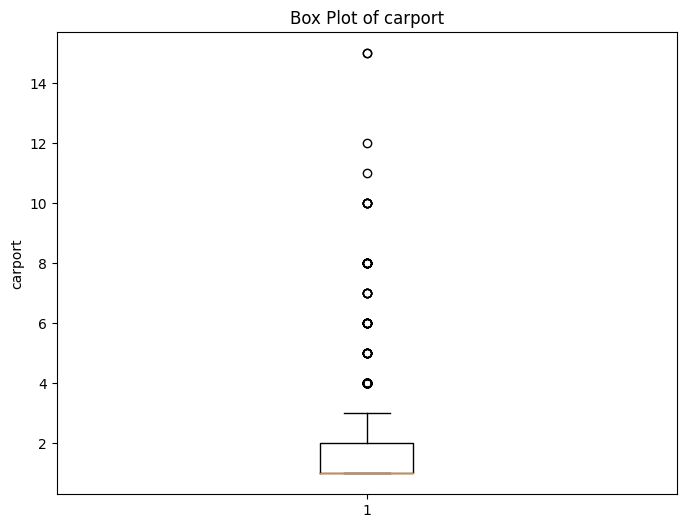

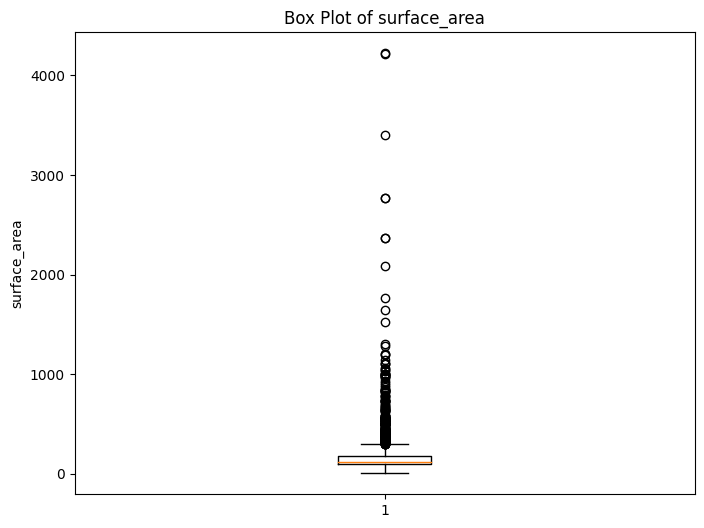

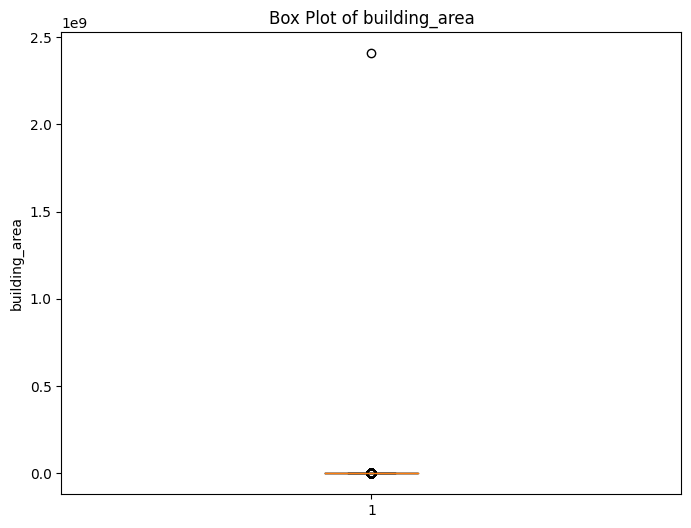

In [14]:
# Create box plots for each numerical column
for column in numerical_columns:
  plt.figure(figsize=(8, 6))
  plt.boxplot(df[column])
  plt.title(f'Box Plot of {column}')
  plt.ylabel(column)
  plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


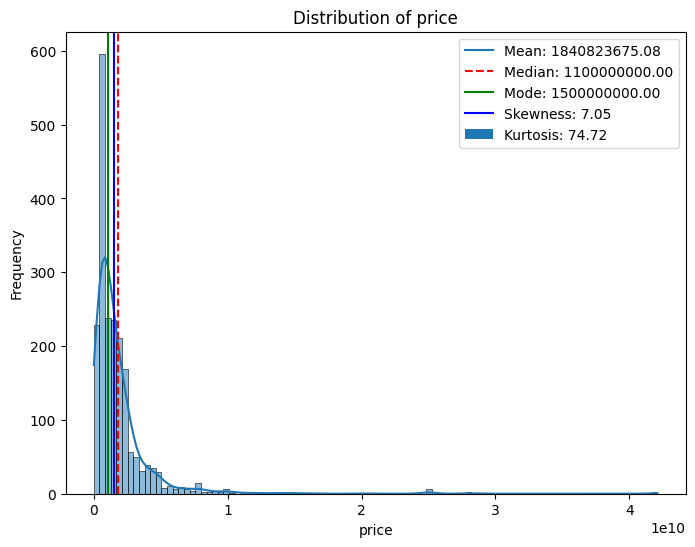

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


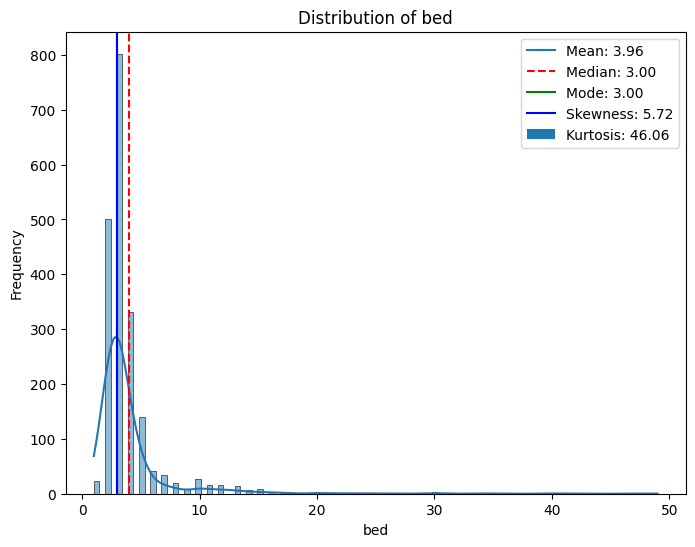

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


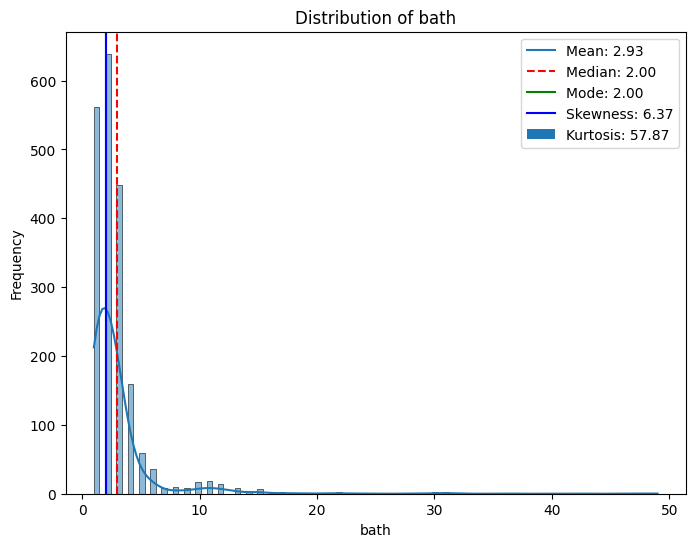

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


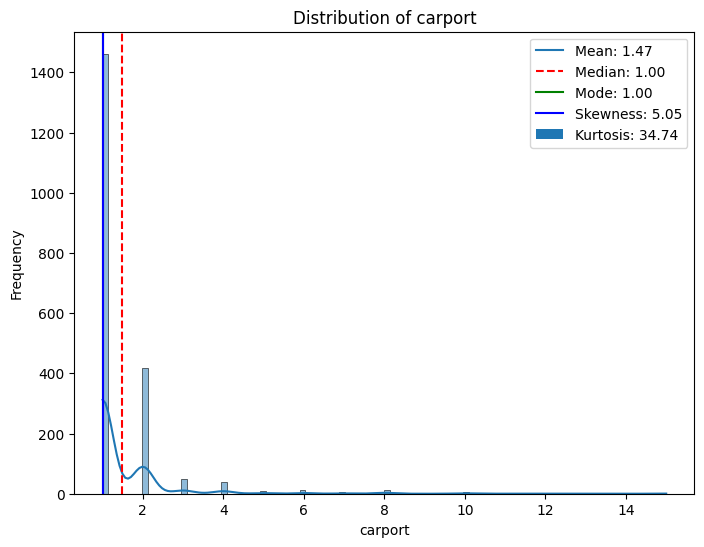

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


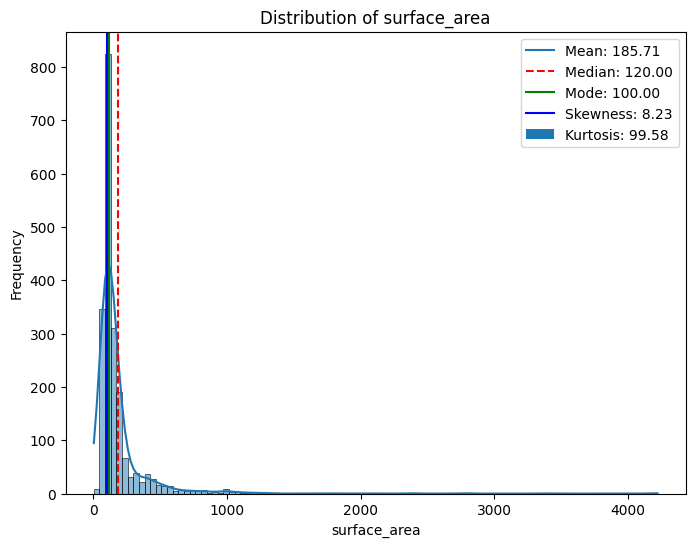

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


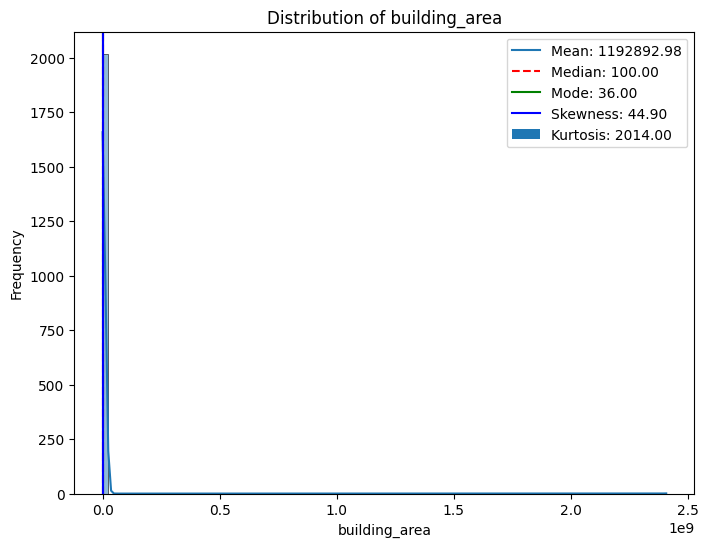

In [15]:
for column in numerical_columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[column], kde=True, bins=100)
    
  # Calculate mean, median, and mode
  mean_value = df[column].mean()
  median_value = df[column].median()
  mode_value = df[column].mode()[0]  # Pandas mode() returns a Series, get the first mode
    
  # Plot vertical lines for mean, median, and mode
  plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
  plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
  plt.axvline(mode_value, color='b', linestyle='-', label=f'Mode: {mode_value:.2f}')
    
   # Add title and labels
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
    
  # Calculate skewness and kurtosis
  column_skewness = skew(df[column].dropna())
  column_kurtosis = kurtosis(df[column].dropna())
    
  # Add legend with skewness, kurtosis, and other statistics
  plt.legend([
      f"Mean: {mean_value:.2f}",
      f"Median: {median_value:.2f}",
      f"Mode: {mode_value:.2f}",
      f"Skewness: {column_skewness:.2f}",
      f"Kurtosis: {column_kurtosis:.2f}"
  ])
    
  # Show the plot
  plt.show()

# Remove Outliner

In [16]:
outliers_index = []

for column in numerical_columns:
    # Calculate IQR for price
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    for idx in outliers.index:
        if idx not in outliers_index:
            outliers_index.append(idx)
    
    print(f"Number of outliers in {column}: {len(outliers)}")

Number of outliers in price: 155
Number of outliers in bed: 145
Number of outliers in bath: 115
Number of outliers in carport: 88
Number of outliers in surface_area: 240
Number of outliers in building_area: 167


In [17]:
df = df.drop(outliers_index)
df.describe()

,price,bed,bath,carport,surface_area,building_area
count,1.641000e+03,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000
mean,1.140248e+09,2.991469,2.047532,1.232176,119.193175,97.359537
std,7.822989e+08,0.948002,0.987820,0.442099,40.458076,53.399437
min,6.900000e+07,1.000000,1.000000,1.000000,36.000000,4.000000
25%,5.750000e+08,2.000000,1.000000,1.000000,90.000000,55.000000
50%,8.450000e+08,3.000000,2.000000,1.000000,110.000000,80.000000
75%,1.600000e+09,3.000000,3.000000,1.000000,139.000000,130.000000
max,4.300000e+09,7.000000,6.000000,3.000000,291.000000,300.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


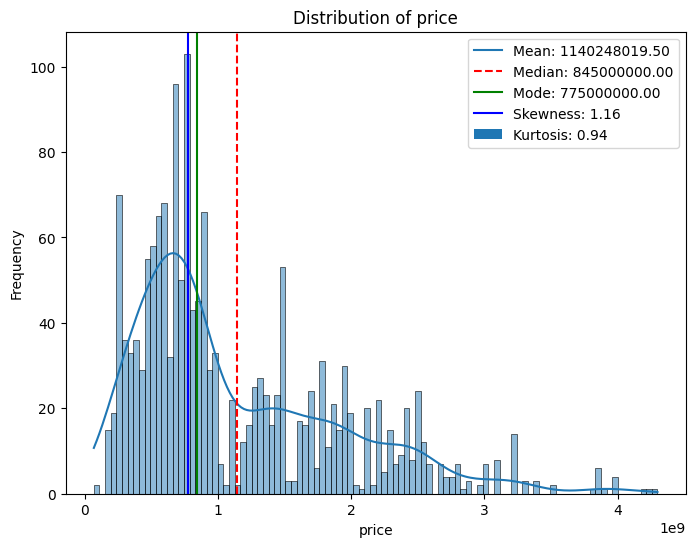

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


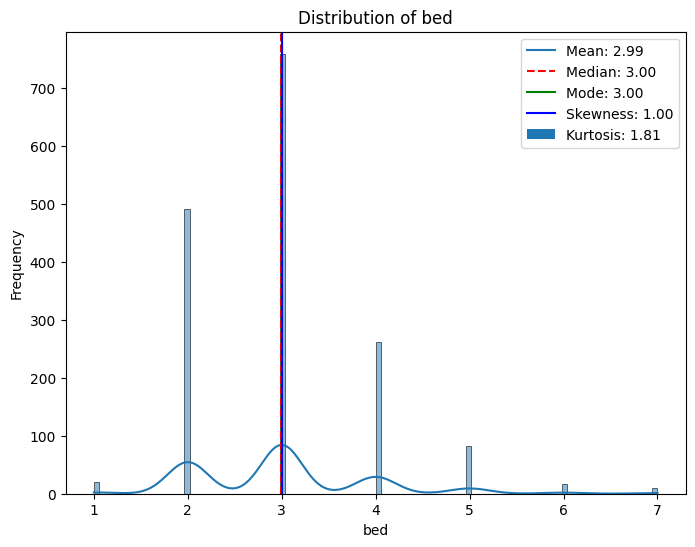

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


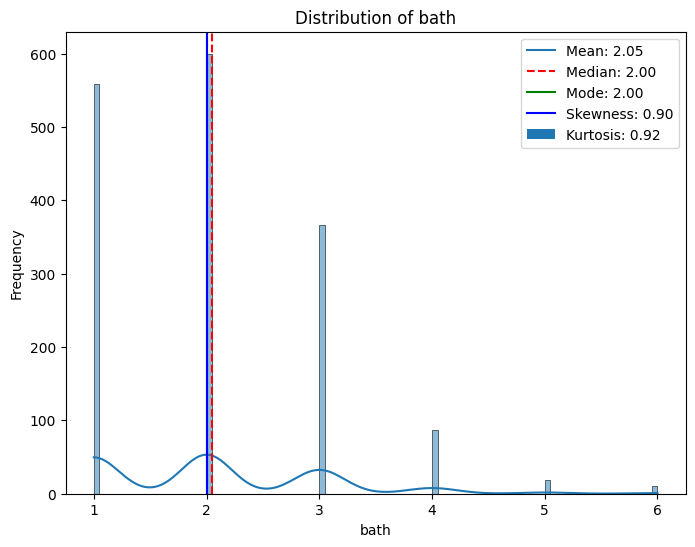

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


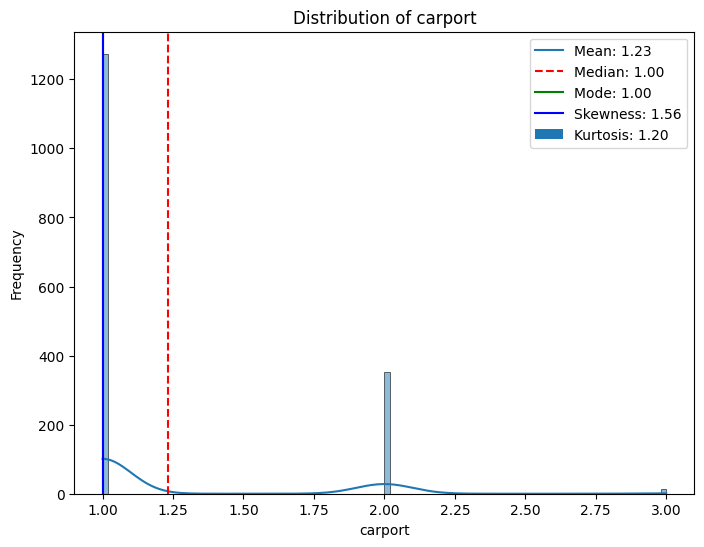

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


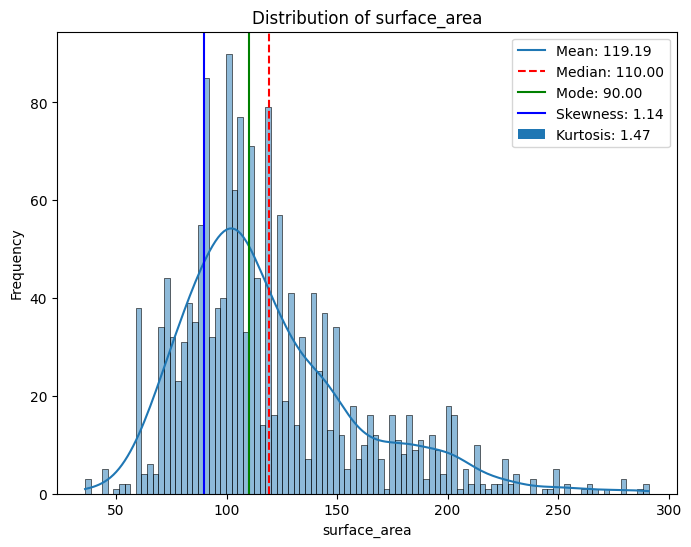

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


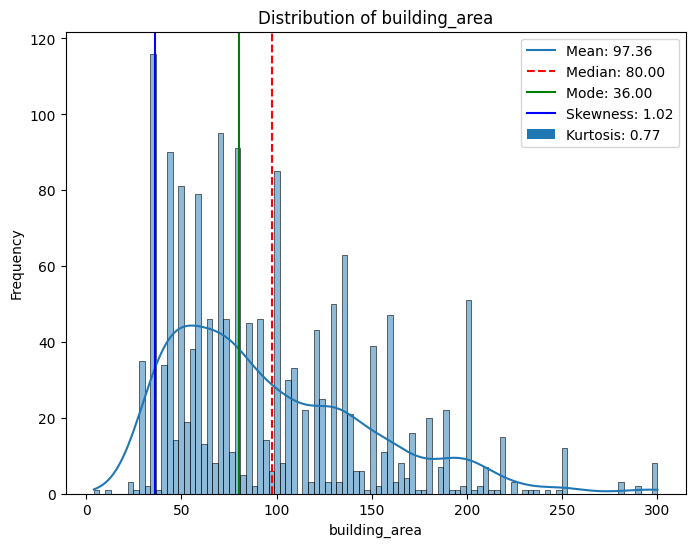

In [18]:
for column in numerical_columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[column], kde=True, bins=100)
    
  # Calculate mean, median, and mode
  mean_value = df[column].mean()
  median_value = df[column].median()
  mode_value = df[column].mode()[0]  # Pandas mode() returns a Series, get the first mode
    
  # Plot vertical lines for mean, median, and mode
  plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
  plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
  plt.axvline(mode_value, color='b', linestyle='-', label=f'Mode: {mode_value:.2f}')
    
   # Add title and labels
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
    
  # Calculate skewness and kurtosis
  column_skewness = skew(df[column].dropna())
  column_kurtosis = kurtosis(df[column].dropna())
    
  # Add legend with skewness, kurtosis, and other statistics
  plt.legend([
      f"Mean: {mean_value:.2f}",
      f"Median: {median_value:.2f}",
      f"Mode: {mode_value:.2f}",
      f"Skewness: {column_skewness:.2f}",
      f"Kurtosis: {column_kurtosis:.2f}"
  ])
    
  # Show the plot
  plt.show()

# Answering Questions

In [19]:
price_max = df['price'].max()
print(f"No. 1.Harga rumah paling mahal atau tertinggi di Yogyakarta: Rp {price_max}")

No. 1.Harga rumah paling mahal atau tertinggi di Yogyakarta: Rp 4300000000


In [20]:
price_min = df['price'].min()
print(f"No. 2.Harga rumah paling murah atau terendah di Yogyakarta: Rp {price_min}")

No. 2.Harga rumah paling murah atau terendah di Yogyakarta: Rp 69000000


No. 3.Property dari tiap daerah
Harga rata-rata tertinggi di harga: listing-location
Caturtunggal, Yogyakarta    2.850000e+09
Name: price, dtype: float64

Harga rata-rata terendah di harga: listing-location
Bambanglipuro, Bantul    162000000.0
Name: price, dtype: float64


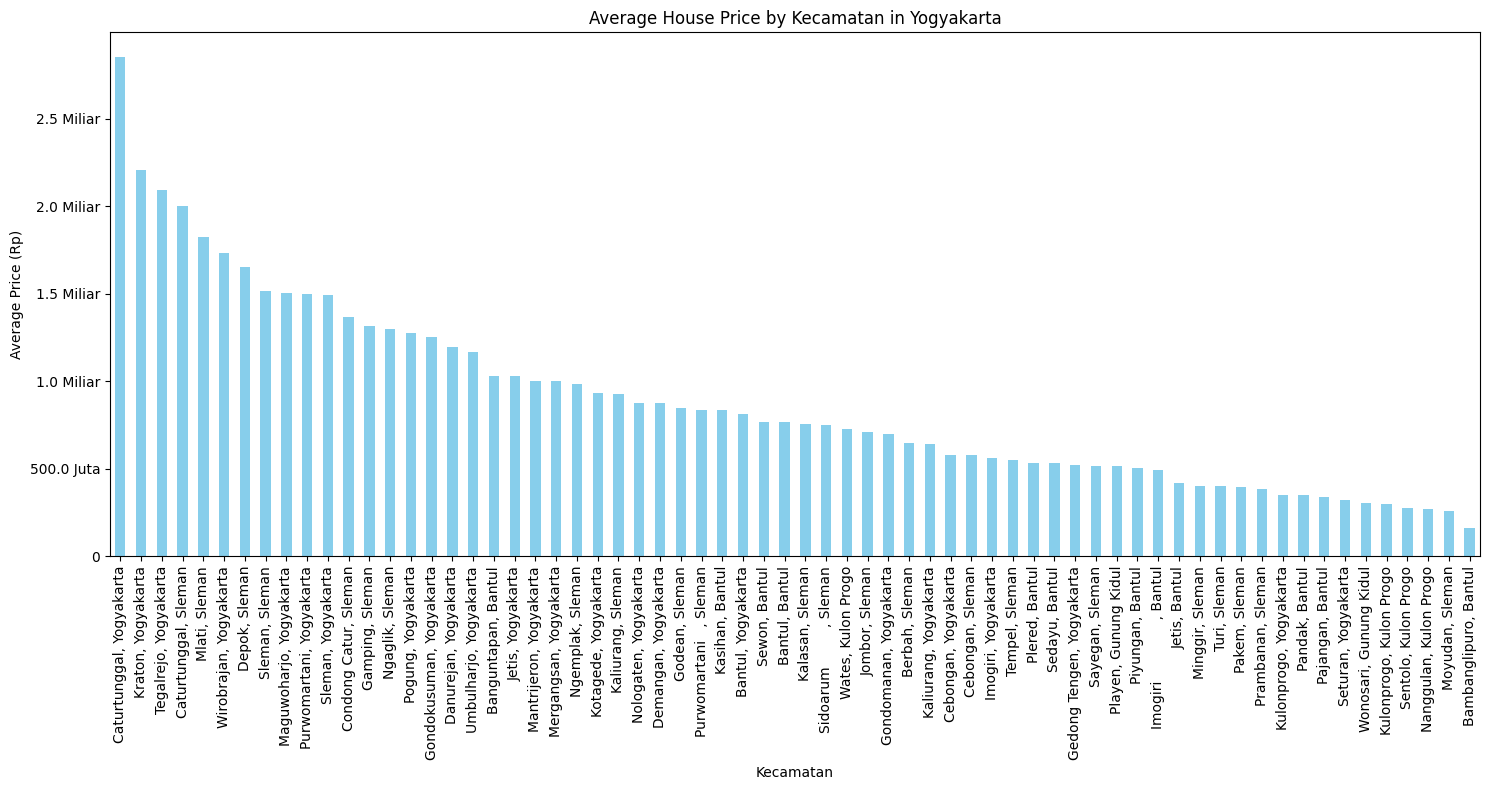

In [21]:
from matplotlib.ticker import FuncFormatter

print("No. 3.Property dari tiap daerah")
# mengambil Data Lokasi dan rata-rata harga
property_mean = df.groupby('listing-location')['price'].mean()
property_mean = property_mean.sort_values(ascending=False)

# Function to format y-axis (show prices in billions or millions)
def price_formatter(x, pos):
    if x >= 1_000_000_000:
        return f'{x/1_000_000_000:.1f} Miliar'
    elif x >= 1_000_000:
        return f'{x/1_000_000:.1f} Juta'
    else:
        return f'{x:.0f}'

print(f"Harga rata-rata tertinggi di harga: {property_mean.head(1)}")
print(f"\nHarga rata-rata terendah di harga: {property_mean.tail(1)}")

# Plotting the bar chart
plt.figure(figsize=(15,8))
property_mean.plot(kind='bar', color='skyblue')
plt.title('Average House Price by Kecamatan in Yogyakarta')
plt.xlabel('Kecamatan')
plt.ylabel('Average Price (Rp)')
plt.xticks(rotation=90)
plt.gca().get_yaxis().set_major_formatter(FuncFormatter(price_formatter))  # Format the y-axis
plt.tight_layout()

# Show plot
plt.show()

No. 4.Rata - rata Property berdasarkan kamar tidur atau kamar mandi


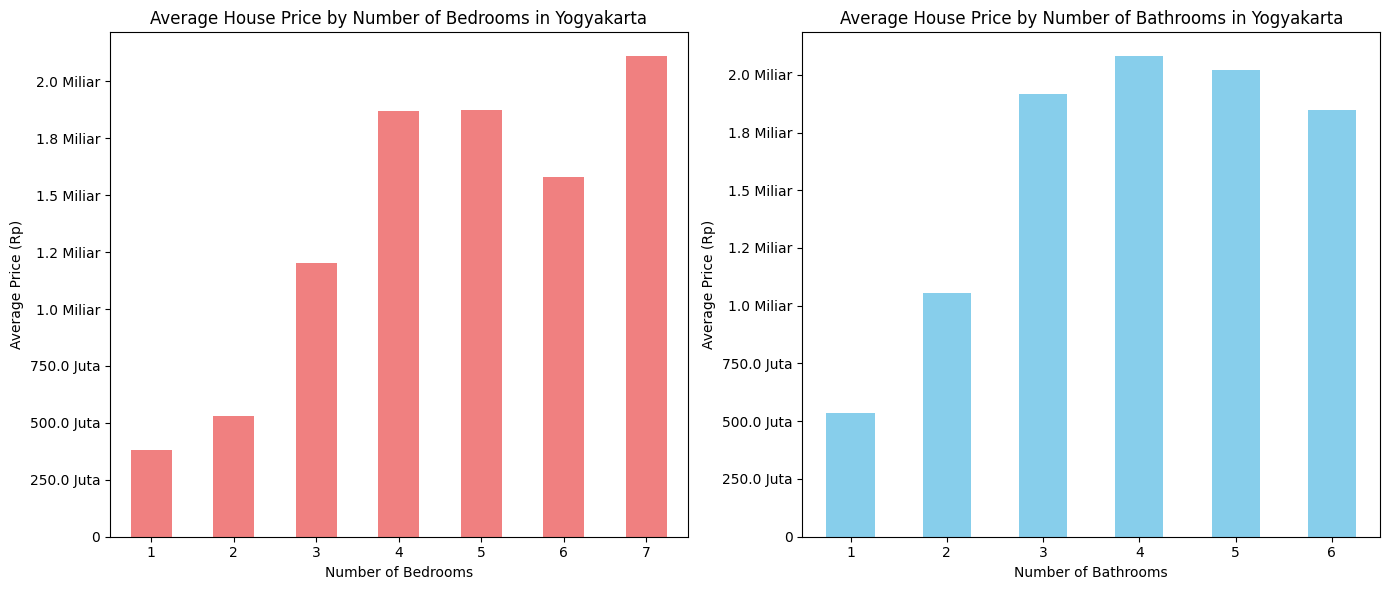

In [22]:
print("No. 4.Rata - rata Property berdasarkan kamar tidur atau kamar mandi")

property_mean_bed = df.groupby('bed')['price'].mean().sort_index()

property_mean_bath = df.groupby('bath')['price'].mean().sort_index()

# Function to format y-axis
def price_formatter(x, pos):
    if x >= 1_000_000_000:
        return f'{x/1_000_000_000:.1f} Miliar'
    elif x >= 1_000_000:
        return f'{x/1_000_000:.1f} Juta'
    else:
        return f'{x:.0f}'
    
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the bar chart for number of bedrooms
property_mean_bed.plot(kind='bar', color='lightcoral', ax=axs[0])
axs[0].set_title('Average House Price by Number of Bedrooms in Yogyakarta')
axs[0].set_xlabel('Number of Bedrooms')
axs[0].set_ylabel('Average Price (Rp)')
axs[0].get_yaxis().set_major_formatter(FuncFormatter(price_formatter))  # Format y-axis
axs[0].set_xticks(range(len(property_mean_bed.index)))  # Set x-ticks for bedrooms
axs[0].set_xticklabels(property_mean_bed.index, rotation=0)

# Plotting the bar chart for number of bathrooms
property_mean_bath.plot(kind='bar', color='skyblue', ax=axs[1])
axs[1].set_title('Average House Price by Number of Bathrooms in Yogyakarta')
axs[1].set_xlabel('Number of Bathrooms')
axs[1].set_ylabel('Average Price (Rp)')
axs[1].get_yaxis().set_major_formatter(FuncFormatter(price_formatter))  # Format y-axis
axs[1].set_xticks(range(len(property_mean_bath.index)))  # Set x-ticks for bathrooms
axs[1].set_xticklabels(property_mean_bath.index, rotation=0)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [23]:
property_mean_bed.describe()

count    7.000000e+00
mean     1.363846e+09
std      6.838153e+08
min      3.813500e+08
25%      8.659432e+08
50%      1.581176e+09
75%      1.871254e+09
max      2.110000e+09
Name: price, dtype: float64

In [24]:
property_mean_bath.describe()

count    6.000000e+00
mean     1.575967e+09
std      6.320510e+08
min      5.340948e+08
25%      1.254385e+09
50%      1.881425e+09
75%      1.995686e+09
max      2.079713e+09
Name: price, dtype: float64

In [25]:
# Menggunakan agg untuk mendapatkan surface_area maksimum
surface_area_max = df.groupby(['listing-location', 'bed', 'bath', 'carport','price'])['surface_area'].max()

surface_area_max
print("No. 5.rumah dengan Luas tanah terbesar di Yogyakarta yaitu:")
surface_area_max.sort_values(ascending=False).head(1)

No. 5.rumah dengan Luas tanah terbesar di Yogyakarta yaitu:


listing-location     bed  bath  carport  price     
Banguntapan, Bantul  4    3     2        2500000000    291
Name: surface_area, dtype: int64

No. 6.harga rata-rata properti per m² (berdasarkan luas tanah atau luas bangunan) yaitu:


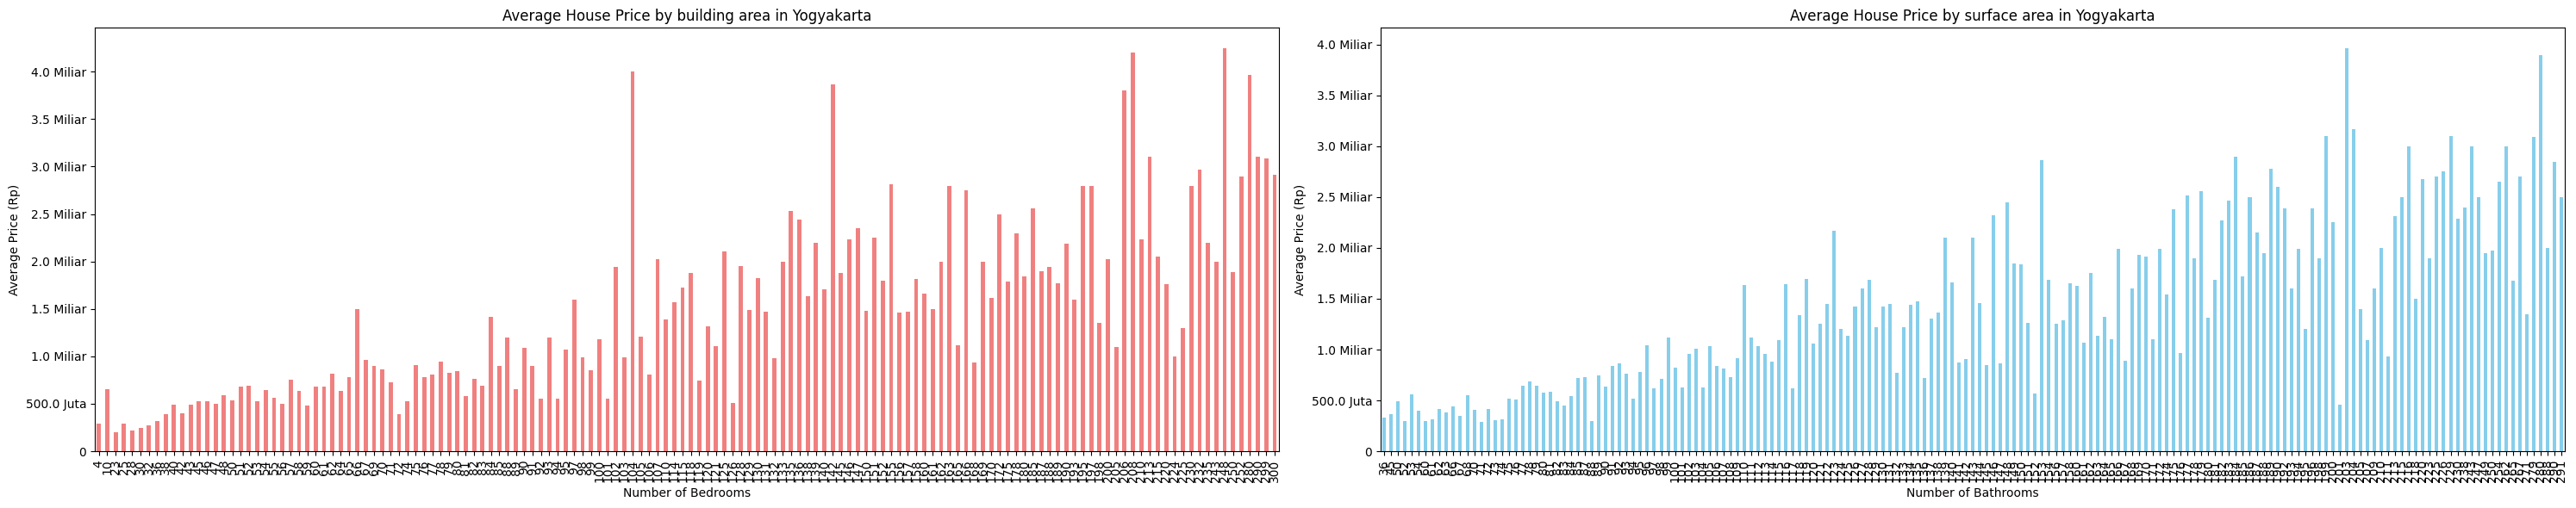

In [26]:
print("No. 6.harga rata-rata properti per m² (berdasarkan luas tanah atau luas bangunan) yaitu:")

property_mean_building = df.groupby(['building_area'])['price'].mean()
property_mean_surface = df.groupby(['surface_area'])['price'].mean()

# Function to format y-axis
def price_formatter(x, pos):
    if x >= 1_000_000_000:
        return f'{x/1_000_000_000:.1f} Miliar'
    elif x >= 1_000_000:
        return f'{x/1_000_000:.1f} Juta'
    else:
        return f'{x:.0f}'
    
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(30, 6))

# Plotting the bar chart for number of bedrooms
property_mean_building.plot(kind='bar', color='lightcoral', ax=axs[0])
axs[0].set_title('Average House Price by building area in Yogyakarta')
axs[0].set_xlabel('Number of Bedrooms')
axs[0].set_ylabel('Average Price (Rp)')
axs[0].get_yaxis().set_major_formatter(FuncFormatter(price_formatter))  # Format y-axis
axs[0].set_xticks(range(len(property_mean_building.index)))  # Set x-ticks for bedrooms
axs[0].set_xticklabels(property_mean_building.index, rotation=90)

# Plotting the bar chart for number of bathrooms
property_mean_surface.plot(kind='bar', color='skyblue', ax=axs[1])
axs[1].set_title('Average House Price by surface area in Yogyakarta')
axs[1].set_xlabel('Number of Bathrooms')
axs[1].set_ylabel('Average Price (Rp)')
axs[1].get_yaxis().set_major_formatter(FuncFormatter(price_formatter))  # Format y-axis
axs[1].set_xticks(range(len(property_mean_surface.index)))  # Set x-ticks for bathrooms
axs[1].set_xticklabels(property_mean_surface.index, rotation=90)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [27]:
property_mean_building.describe()

count    1.420000e+02
mean     1.472423e+09
std      9.339492e+08
min      1.983333e+08
25%      6.936250e+08
50%      1.307487e+09
75%      2.000000e+09
max      4.250000e+09
Name: price, dtype: float64

In [28]:
property_mean_surface.describe()

count    1.710000e+02
mean     1.449841e+09
std      8.308344e+08
min      2.930000e+08
25%      7.544886e+08
50%      1.312500e+09
75%      1.990000e+09
max      3.966667e+09
Name: price, dtype: float64

In [29]:
print("No. 7.Distribusi harga properti di setiap kecamatan, mana yang paling mahal atau paling murah yaitu:")

# Group by 'listing-location' and calculate statistics
price_distribution = df.groupby('listing-location')['price'].agg(['max', 'min', 'mean', 'count']).reset_index()

# Menentukan kecamatan dengan harga tertinggi dan terendah
most_expensive = price_distribution.loc[price_distribution['max'].idxmax()]
least_expensive = price_distribution.loc[price_distribution['min'].idxmin()]

print("a. Kecamatan dengan harga properti tertinggi:")
print(most_expensive)

print("\nb. Kecamatan dengan harga properti terendah:")
print(least_expensive)

No. 7.Distribusi harga properti di setiap kecamatan, mana yang paling mahal atau paling murah yaitu:
a. Kecamatan dengan harga properti tertinggi:
listing-location      Ngaglik, Sleman
max                        4300000000
min                         155000000
mean                1298146017.699115
count                             226
Name: 38, dtype: object

b. Kecamatan dengan harga properti terendah:
listing-location    Maguwoharjo, Yogyakarta
max                              3200000000
min                                69000000
mean                      1501907692.307692
count                                    65
Name: 31, dtype: object


In [30]:
print("No. 8.harga rumah berdasarkan kriteria tertentu seperti minimal 3 kamar tidur dan 2 kamar mandi yaitu:")

price_home_criteria = df[(df['bed'] >= 3) & (df['bath'] >= 2)]
# Mencari harga terendah dan tertinggi dari rumah yang telah difilter
lowest_price = price_home_criteria['price'].min()
highest_price = price_home_criteria['price'].max()

print("\nHarga terendah dari rumah dengan minimal 3 kamar tidur dan 2 kamar mandi adalah: Rp", lowest_price)
print("\nHarga tertinggi dari rumah dengan minimal 3 kamar tidur dan 2 kamar mandi adalah: Rp", highest_price)

No. 8.harga rumah berdasarkan kriteria tertentu seperti minimal 3 kamar tidur dan 2 kamar mandi yaitu:

Harga terendah dari rumah dengan minimal 3 kamar tidur dan 2 kamar mandi adalah: Rp 69000000

Harga tertinggi dari rumah dengan minimal 3 kamar tidur dan 2 kamar mandi adalah: Rp 4300000000


# Kesimpulan

1. Harga tertinggi rumah di Yogyakarta yaitu sebesar Rp 4.300.000.000 atau Rp 4.3 Miliar.  

2. Harga terendah dari rumah di yogyakarta yaitu sebesar Rp 69.000.000 atau Rp 69 Juta.

3. Rata-rata properti di setiap kecamatan tertinggi didapat pada kecamatan Caturtunggal, Yogyakarta dengan rata-rata angka 2.85 miliar dan terendah pada kecamatan bambanglipiro, bantul dengan rata rata angka 162 juta.

4. harga rata-rata properti berdasarkan jumlah kamar tidur yaitu sebesar Rp. 1.363 miliar atau kamar mandi yaitu sebesar Rp 1.575 miliar.

5. properti dengan luas tanah terbesar di Yogyakarta yaitu dengan 4 kasur, 3 kamar mandi, 2 garasi, dengan harga Rp 250 miliar, dan luas tanah sebesar 291m2.

6. harga rata-rata properti per m² berdasarkan luas tanah yaitu dengan harga Rp. 1.449 miliar atau luas bangunan yaitu dengan harga Rp. 1.472 miliar

7. Distribusi harga properti di setiap kecamatan yang paling mahal di ngaglik, sleman dengan harga tertinggi mencapai 4,3 Triliun atau paling murah di Maguwoharjo, sleman dengan harga terendah nya 69 juta.

8. harga rumah berdasarkan kriteria tertentu seperti minimal 3 kamar tidur dan 2 kamar mandi yang tertinggi di angka 4,3 triliun dan terendah di angka 69 juta.
